In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox
from urllib.request import urlopen
from PIL import Image
import urllib
from mplsoccer import add_image

In [7]:
df = pd.read_csv('xg.csv')
df = df[df['Team']=='Besiktas']
df = df[['MD','xG for','xG against']]
df1 = pd.read_csv('bjk_xg.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1['MD'] = ['MD ' + str(x) for x in np.arange(1,39,1)]
df1 = df1.tail(8)
df1 = df1[['MD','bjk_xG','opp_xG']]
df1.rename(columns={'bjk_xG':'xG for','opp_xG':'xG against'},inplace=True)
roll = pd.concat([df1,df]).reset_index(drop=True)
roll['xG for'] = roll['xG for'].rolling(window=5,min_periods=1).mean()
roll['xG against'] = roll['xG against'].rolling(window=5,min_periods=1).mean()

### xG Rolling Flow

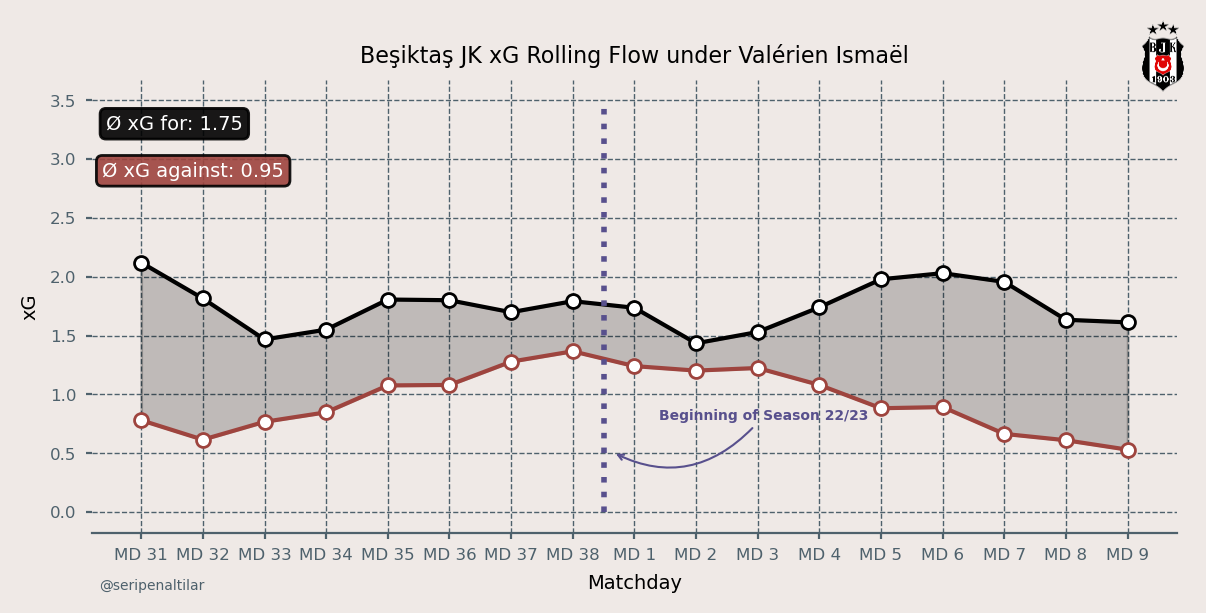

In [8]:
fig = plt.figure(figsize=(7,3), dpi = 200, facecolor = "#EFE9E6")

ax = plt.subplot(facecolor = "#EFE9E6")

ax.spines[['left','top','right']].set_visible(False)

ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

ax.plot(roll['MD'],roll['xG for'],marker="o",mfc='white',ms=5,c='#000000',label='xG for')
ax.plot(roll['MD'],roll['xG against'],marker='o',mfc='white',ms=5,c='#9e443e',label='xG against')


# Fill between
ax.fill_between(
    roll['MD'], 
    roll['xG against'],
    roll['xG for'], 
    where = roll['xG for'] >= roll['xG against'], 
    interpolate = True,
    alpha = 0.2,
    zorder = 2,
    color = '#000000'
)

ax.fill_between(
    roll['MD'], 
    roll['xG against'],
    roll['xG for'], 
    where = roll['xG against'] > roll['xG for'], 
    interpolate = True,
    alpha = 0.2,
    zorder = 2,
    color = '#9e443e'
)   

ax.plot(
    [7.5,7.5],
    [0, 3.5],
    ls = ":",
    lw = 2,
    color = "#58508d",
    zorder = 2
)

ax.annotate(
    xy = (7.5, .55),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Beginning of Season 22/23",
    size = 5,
    color = "#58508d",
    fontweight='bold',
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="#58508d", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)

ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)
ax.yaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)

ax.spines["bottom"].set_edgecolor("#4E616C")


ax.annotate('Ø xG for: ' + str(round(roll['xG for'].mean(),2)), xy=(3,3.3),
             xytext=(-30, 0), textcoords='offset points',
             size=7, ha='right', va="center",c='white',
             bbox=dict(boxstyle="round", alpha=0.9,facecolor='000000'))

ax.annotate('Ø xG against: ' + str(round(roll['xG against'].mean(),2)), xy=(3.67,2.9),
             xytext=(-30, 0), textcoords='offset points',
             size=7, ha='right', va="center",c='white',
             bbox=dict(boxstyle="round", alpha=0.9,facecolor='#9e443e'))

plt.xlabel('Matchday',size=7)
plt.ylabel('xG',size=7)
plt.figtext(0.13,0.03,'@seripenaltilar',color='#4E616C',fontsize=5)
plt.title('Beşiktaş JK xG Rolling Flow under Valérien Ismaël',size=8)

URL = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Be%C5%9Fikta%C5%9F_Logo_Be%C5%9Fikta%C5%9F_Amblem_Be%C5%9Fikta%C5%9F_Arma.png/1200px-Be%C5%9Fikta%C5%9F_Logo_Be%C5%9Fikta%C5%9F_Amblem_Be%C5%9Fikta%C5%9F_Arma.png'
image = Image.open(urlopen(URL))

ax_image = add_image(
    image, fig, left=0.83, bottom=0.86, width=0.12, height=0.12
)

plt.show()